Takes in .AWD, sleep log if it exists, calendar, and spits out some pretty pictures

In [1]:
import os,sys,inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, '/data/MoodGroup/actigraphy/gavi/actigraPy') 

import actigraPy.actigraPy as act
import importlib
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import timedelta

/data/MoodGroup/actigraphy/gavi/actigraPy/actigraPy/actigraPy.py:23: MatplotlibDeprecationWarning: 
The matplotlib.backends.tkagg module was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  import matplotlib.backends.tkagg as tkagg


If you want to run the test data, run this cell instead of the one below

In [2]:
# data and log directories
sub = '303' #subject NUMBER as STRING
sub_long = 'sub-MOA%s'%sub

data_dir = '/data/MoodGroup/actigraphy/KMOA/raw/%s'%sub_long #output directory
out_dir = '/home/shandlergs/output/%s'%sub_long

if not os.path.exists(out_dir):
    os.mkdir(out_dir)


## Subject and directory info

In [3]:
fn = {}
#.AWD
awd_fn = os.path.join(data_dir, '%s.AWD'%sub_long)
#sleeplog
fn['cal']= os.path.join(data_dir, '%s_calendar_log.xls'%sub_long)
#calendar
fn['log'] = os.path.join(data_dir, '%s_sleeplog.xls'%sub_long)
logs = []

if os.path.isfile(awd_fn):
    for name in fn.keys():
        if os.path.isfile(fn[name]):
            print("%s has %s file at %s"%(sub,name,fn[name]))
            logs.append(fn[name])
        else:
            print("no " + name)
            fn[name] = ''
else:
    print("DO NOT CONTINUE!! THERE IS NO AWD FILE")

303 has cal file at /data/MoodGroup/actigraphy/KMOA/raw/sub-MOA303/sub-MOA303_calendar_log.xls
no log


### Make Mtimes file

Figure out where to clip awd file

In [4]:
awd_dat = act.read_AWD(awd_fn)


## Now just run these cells in order to extract comments and write Mtimes

In [5]:
importlib.reload(act)
#Make master mk_idx
mk_idx=act.get_markers(awd_dat)

In [6]:
importlib.reload(act)
#Read logs
for name in fn.keys():
    if os.path.isfile(fn[name]):
        log_dat,kw_dat= act.read_log(fn[name],awd_dat)
        mk_idx[name]=log_dat['idx']
        


      OffDate   OffTime     OnDate    OnTime                   Comment
0         NaT       NaN 2011-09-26  14:00:00                     Start
1  2011-09-26  17:00:00 2011-09-26  19:00:00                       MEG
2  2011-09-26  21:30:00 2011-09-27  07:00:00               Sleep Study
3  2011-09-27  12:00:00 2011-09-27  14:30:00                        3T
4  2011-09-28  21:30:00 2011-09-29  07:00:00               Sleep Study
5  2011-09-29  09:00:00 2011-09-29  09:40:00                  Infusion
6  2011-09-29  15:30:00 2011-09-29  17:00:00                       MEG
7  2011-09-29  21:30:00 2011-09-30  07:00:00               Sleep Study
8  2011-09-30  13:00:00 2011-09-30  15:00:00                        7T
9  2011-10-01  14:00:00 2011-10-01  16:00:00                        3T
10 2011-10-10  21:30:00 2011-10-11  07:00:00               Sleep Study
11 2011-10-11  10:00:00 2011-10-11  12:00:00                        7T
12 2011-10-11  15:00:00 2011-10-11  16:30:00                       MEG
13 201

Make passes their own marker

In [7]:
mk_idx['cal']

[(183, 303, 'MEG'),
 (453, 1023, 'Sleep Study'),
 (1323, 1473, '3T'),
 (3333, 3903, 'Sleep Study'),
 (4023, 4063, 'Infusion'),
 (4413, 4503, 'MEG'),
 (4773, 5343, 'Sleep Study'),
 (5703, 5823, '7T'),
 (7203, 7323, '3T'),
 (20613, 21183, 'Sleep Study'),
 (21363, 21483, '7T'),
 (21663, 21753, 'MEG'),
 (23493, 24063, 'Sleep Study'),
 (24183, 24223, 'Infusion'),
 (24543, 24633, 'MEG'),
 (24933, 25503, 'Sleep Study'),
 (25743, 25863, '7T'),
 (27243, 27363, '3T'),
 (40323, 40443, '3T'),
 (40503, 40563, 'MEG'),
 (40773, 41343, 'Sleep Study'),
 (41523, 41643, '7T'),
 (1511, 3331, 'On pass'),
 (5501, 7054, 'On pass'),
 (7250, 8373, 'On pass (guessed at end)'),
 (8423, 17225, 'On pass'),
 (17363, 20593, 'On pass'),
 (21716, 23464, 'On pass'),
 (25715, 27163, 'On pass'),
 (27234, 28584, 'On pass'),
 (28589, 40132, 'On pass'),
 (41455, 44401, 'On pass')]

In [8]:
rm_idx=[]
for idx,block in enumerate(mk_idx['cal']):
    comment = block[2]
    if 'pass' in comment:
        rm_idx.append(idx)
rm_idx.sort(reverse=True)
mk_idx['pass']=[]
for idx in rm_idx:
    block = mk_idx['cal'].pop(idx)
    mk_idx['pass'].append(block)
mk_idx['pass']

[(41455, 44401, 'On pass'),
 (28589, 40132, 'On pass'),
 (27234, 28584, 'On pass'),
 (25715, 27163, 'On pass'),
 (21716, 23464, 'On pass'),
 (17363, 20593, 'On pass'),
 (8423, 17225, 'On pass'),
 (7250, 8373, 'On pass (guessed at end)'),
 (5501, 7054, 'On pass'),
 (1511, 3331, 'On pass')]

In [9]:
mk_idx['cal']

[(183, 303, 'MEG'),
 (453, 1023, 'Sleep Study'),
 (1323, 1473, '3T'),
 (3333, 3903, 'Sleep Study'),
 (4023, 4063, 'Infusion'),
 (4413, 4503, 'MEG'),
 (4773, 5343, 'Sleep Study'),
 (5703, 5823, '7T'),
 (7203, 7323, '3T'),
 (20613, 21183, 'Sleep Study'),
 (21363, 21483, '7T'),
 (21663, 21753, 'MEG'),
 (23493, 24063, 'Sleep Study'),
 (24183, 24223, 'Infusion'),
 (24543, 24633, 'MEG'),
 (24933, 25503, 'Sleep Study'),
 (25743, 25863, '7T'),
 (27243, 27363, '3T'),
 (40323, 40443, '3T'),
 (40503, 40563, 'MEG'),
 (40773, 41343, 'Sleep Study'),
 (41523, 41643, '7T')]

Write Mtimes

In [10]:
importlib.reload(act)
act.write_Mtimes(awd_dat,mk_idx,os.path.join(out_dir,sub_long))

,OnDate,OnTime,OffDate,OffTime,marker,Comment
0,26-Sep-11,02:10 PM,26-Sep-11,02:26 PM,z,
1,26-Sep-11,02:58 PM,26-Sep-11,04:44 PM,z,
2,26-Sep-11,04:56 PM,26-Sep-11,05:18 PM,z,
3,26-Sep-11,05:00 PM,26-Sep-11,07:00 PM,cal,MEG
4,26-Sep-11,05:48 PM,26-Sep-11,06:06 PM,z,
5,26-Sep-11,06:12 PM,26-Sep-11,06:42 PM,z,
6,26-Sep-11,06:58 PM,26-Sep-11,07:48 PM,z,
7,26-Sep-11,07:58 PM,26-Sep-11,10:00 PM,z,
8,26-Sep-11,09:30 PM,27-Sep-11,07:00 AM,cal,Sleep Study
9,26-Sep-11,10:20 PM,26-Sep-11,10:40 PM,z,


## Clip AWD for graphs

In [11]:
#read AWD file
awd_dat = act.read_AWD(awd_fn)
idx={'start':[0],'end':[len(awd_dat['dt_list'])-1]}
#get the start and stops from each log if they exist
for log in logs:
    print(log)
    _, kw_dat = act.read_log(log,awd_dat)
    
    if 'watch_on' in kw_dat.keys():
        on_date = kw_dat['watch_on'].iloc[0]['OnDate']
        on_time = kw_dat['watch_on'].iloc[0]['OnTime']
        on = datetime(on_date.year,on_date.month,on_date.day,on_time.hour,on_time.minute)
        #check if that time is in dt_list:
        if awd_dat['dt_list'].count(on) > 0:
            on_idx=awd_dat['dt_list'].index(on)
            idx['start'].append(on_idx)

    if 'watch_off' in kw_dat.keys():
        off_date = kw_dat['watch_off'].iloc[0]['OffDate']
        off_time = kw_dat['watch_off'].iloc[0]['OffTime']
        off = datetime(off_date.year,off_date.month,off_date.day,off_time.hour,off_time.minute)
        if awd_dat['dt_list'].count(off) > 0:
            off_idx=awd_dat['dt_list'].index(off)
            idx['end'].append(off_idx)
 
idx

/data/MoodGroup/actigraphy/KMOA/raw/sub-MOA303/sub-MOA303_calendar_log.xls
      OffDate   OffTime     OnDate    OnTime                   Comment
0         NaT       NaN 2011-09-26  14:00:00                     Start
1  2011-09-26  17:00:00 2011-09-26  19:00:00                       MEG
2  2011-09-26  21:30:00 2011-09-27  07:00:00               Sleep Study
3  2011-09-27  12:00:00 2011-09-27  14:30:00                        3T
4  2011-09-28  21:30:00 2011-09-29  07:00:00               Sleep Study
5  2011-09-29  09:00:00 2011-09-29  09:40:00                  Infusion
6  2011-09-29  15:30:00 2011-09-29  17:00:00                       MEG
7  2011-09-29  21:30:00 2011-09-30  07:00:00               Sleep Study
8  2011-09-30  13:00:00 2011-09-30  15:00:00                        7T
9  2011-10-01  14:00:00 2011-10-01  16:00:00                        3T
10 2011-10-10  21:30:00 2011-10-11  07:00:00               Sleep Study
11 2011-10-11  10:00:00 2011-10-11  12:00:00                        7T
12

{'start': [0, 3], 'end': [55966, 45242]}

In [12]:
start = max(idx['start'])
end = min(idx['end'])
print('start = %d, end = %d'%(start,end))

start = 3, end = 45242


## <font color='red'>Make sure the starts and ends make sense before clipping the data</font>


In [13]:
#put own number in start + end if disagree with above!
lim = [(awd_dat['DateTime'][start],awd_dat['DateTime'][end],"")]
clip_dat = act.clip_dat(lim,awd_dat)

In [14]:
clip_dat['DateTime'][-1]

'27-Oct-11 11:58 PM'

In [15]:
log_dat,kw_dat = act.read_log(os.path.join(out_dir,sub_long+'_Mtimes.csv'),clip_dat)

        OnDate    OnTime    OffDate   OffTime marker      Comment
0    26-Sep-11  02:10 PM  26-Sep-11  02:26 PM      z             
1    26-Sep-11  02:58 PM  26-Sep-11  04:44 PM      z             
2    26-Sep-11  04:56 PM  26-Sep-11  05:18 PM      z             
3    26-Sep-11  05:00 PM  26-Sep-11  07:00 PM    cal          MEG
4    26-Sep-11  05:48 PM  26-Sep-11  06:06 PM      z             
5    26-Sep-11  06:12 PM  26-Sep-11  06:42 PM      z             
6    26-Sep-11  06:58 PM  26-Sep-11  07:48 PM      z             
7    26-Sep-11  07:58 PM  26-Sep-11  10:00 PM      z             
8    26-Sep-11  09:30 PM  27-Sep-11  07:00 AM    cal  Sleep Study
9    26-Sep-11  10:20 PM  26-Sep-11  10:40 PM      z             
10   26-Sep-11  10:46 PM  26-Sep-11  11:02 PM      z             
11   26-Sep-11  11:08 PM  27-Sep-11  01:40 AM      z             
12   27-Sep-11  01:46 AM  27-Sep-11  03:24 AM      z             
13   27-Sep-11  03:30 AM  27-Sep-11  06:26 AM      z             
14   27-Se

In [16]:
mk_idx=log_dat['mks']

## Make graphs

In [17]:
plots = {}
for name in fn.keys():
    if name in mk_idx.keys():
        plots[name]=mk_idx[name]
if 'pass' in mk_idx.keys():
    plots['pass']=mk_idx['pass']

In [18]:
plots

{'cal': [(180, 300, 'MEG'),
  (450, 1020, 'Sleep Study'),
  (1320, 1470, '3T'),
  (3330, 3900, 'Sleep Study'),
  (4020, 4060, 'Infusion'),
  (4410, 4500, 'MEG'),
  (4770, 5340, 'Sleep Study'),
  (5700, 5820, '7T'),
  (7200, 7320, '3T'),
  (20610, 21180, 'Sleep Study'),
  (21360, 21480, '7T'),
  (21660, 21750, 'MEG'),
  (23490, 24060, 'Sleep Study'),
  (24180, 24220, 'Infusion'),
  (24540, 24630, 'MEG'),
  (24930, 25500, 'Sleep Study'),
  (25740, 25860, '7T'),
  (27240, 27360, '3T'),
  (40320, 40440, '3T'),
  (40500, 40560, 'MEG'),
  (40770, 41340, 'Sleep Study'),
  (41520, 41640, '7T')],
 'pass': [(1508, 3328, 'On pass'),
  (5498, 7051, 'On pass'),
  (7247, 8370, 'On pass (guessed at end)'),
  (8420, 17222, 'On pass'),
  (17360, 20590, 'On pass'),
  (21713, 23461, 'On pass'),
  (25712, 27160, 'On pass'),
  (27231, 28581, 'On pass'),
  (28586, 40129, 'On pass'),
  (41452, 44398, 'On pass')]}

32
26-Sep-11
0 599
plotting: 1020,1140 from cal
plotting: 1290,1439 from cal
27-Sep-11
600 2039
plotting: 0,420 from cal
plotting: 720,870 from cal
plotting: 908,1439 from pass
28-Sep-11
2040 3479
plotting: 1290,1439 from cal
plotting: 0,1288 from pass
29-Sep-11
3480 4919
plotting: 0,420 from cal
plotting: 540,580 from cal
plotting: 930,1020 from cal
plotting: 1290,1439 from cal
30-Sep-11
4920 6359
plotting: 0,420 from cal
plotting: 780,900 from cal
plotting: 578,1439 from pass
01-Oct-11
6360 7799
plotting: 840,960 from cal
plotting: 0,691 from pass
plotting: 887,1439 from pass
02-Oct-11
7800 9239
plotting: 0,570 from pass
plotting: 620,1439 from pass
03-Oct-11
9240 10679
plotting: 0,1439 from pass
04-Oct-11
10680 12119
plotting: 0,1439 from pass
05-Oct-11
12120 13559
plotting: 0,1439 from pass
06-Oct-11
13560 14999
plotting: 0,1439 from pass
07-Oct-11
15000 16439
plotting: 0,1439 from pass
08-Oct-11
16440 17879
plotting: 0,782 from pass
plotting: 920,1439 from pass
09-Oct-11
17880 193

KeyboardInterrupt: 

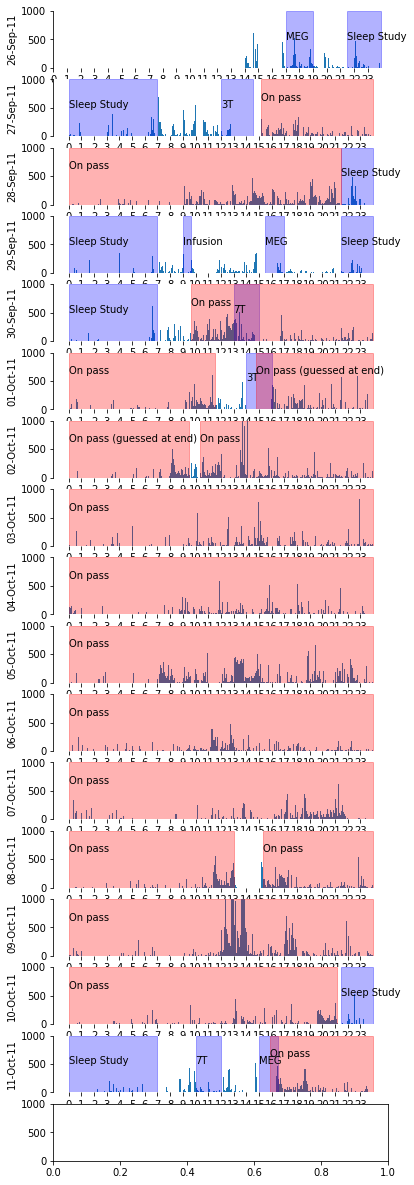

In [19]:
importlib.reload(act)

act.plot_awd(clip_dat,plots,max_act=1000, show=False,fn_pref=os.path.join(out_dir,sub_long+'_M+logs'),plot_type='single',debug=True)


In [ ]:
importlib.reload(act)

act.plot_awd(clip_dat,plots,max_act=250,show=False,fn_pref=os.path.join(out_dir,sub_long+'_M+logs_zoom'),plot_type='single',debug=True)
